# Desafio semana 08 AceleraDev DS Codenation

### Importar bibliotecas

In [190]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, SGDRegressor, Lasso, ElasticNet, Lars, LassoLars, HuberRegressor, BayesianRidge, PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Carregar arquivos

In [191]:
# Importação dos dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Exploração dos dados

In [192]:
train.shape

(13730, 167)

In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 14.4+ MB


In [194]:
train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [195]:
train.isna().sum().sort_values(ascending=False)

CO_UF_ENTIDADE_CERTIFICACAO    12092
NO_ENTIDADE_CERTIFICACAO       12092
SG_UF_ENTIDADE_CERTIFICACAO    12092
Q041                           10792
TP_SIT_FUNC_ESC                 9448
                               ...  
Q002                               0
Q003                               0
Q004                               0
Q005                               0
Unnamed: 0                         0
Length: 167, dtype: int64

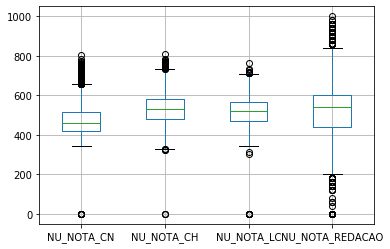

In [196]:
# Verificando possíveis outliers
train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].boxplot();

In [197]:
# Notas outliers colunas de notas
out_smaller = train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_MT']].query('NU_NOTA_CN == 0 or NU_NOTA_CH == 0 or NU_NOTA_LC == 0 or NU_NOTA_REDACAO == 0')
out_smaller

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
90,460.7,505.8,448.2,0.0,351.3
92,431.1,431.7,467.8,0.0,413.0
111,0.0,0.0,0.0,0.0,0.0
191,426.3,487.0,394.2,0.0,351.0
288,467.2,536.1,514.5,0.0,425.7
...,...,...,...,...,...
13600,0.0,326.2,0.0,400.0,0.0
13601,441.6,405.3,345.8,0.0,498.4
13603,447.1,481.2,449.4,0.0,477.0
13658,459.4,535.0,543.8,0.0,434.9


In [198]:
# Eliminando outliers notas igual a 0
train.drop(out_smaller.index, inplace=True)

### Encontrando as melhores features

In [199]:
# Selecionando apenas as colunas numéricas da base de teste
number_columns = list(test.select_dtypes(include='number').columns)

In [200]:
# Dividindo o dataset de treino em features e target
X = train[number_columns]
y = train.NU_NOTA_MT

In [201]:
# Eliminando valores nulos na base de teste, substituindo por 0
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

c:\program files (x86)\python\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [202]:
# Utilizando a função SelectKBest para encontrar as melhores features
selector = SelectKBest(f_classif, k=25)

# Aplicando a função nas features e target para encontrar as melhores features
X_new = selector.fit_transform(X, y)

c:\program files (x86)\python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [11 14] are constant.
  UserWarning)
c:\program files (x86)\python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
c:\program files (x86)\python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [203]:
# Os scores de cada features
selector.scores_

array([9.71320440e-01, 9.98763418e-01, 1.07596297e+00, 8.93952033e-01,
       8.39980595e-01, 9.67886677e-01, 1.64639949e+00, 9.21356181e-01,
       1.22024703e+00, 1.62627969e+00, 1.06207579e+00,            nan,
       4.90018729e-01, 1.48640259e+00,            inf, 9.69000138e-01,
       3.76594286e-01, 4.24816479e-01, 2.52698415e+01, 2.52698415e+01,
       3.54759359e+02, 2.24972901e+01, 2.24035507e+01, 9.34693879e+01,
       1.11797563e+00, 3.91918743e+03, 3.88408579e+01, 2.44077607e+01,
       2.11941555e+01, 2.57783035e+01, 7.24622093e+00, 2.80080344e+01])

In [204]:
# Lista das posições das features escolhidas
features = list(selector.get_support(indices=True))

In [205]:
# Utilizando as posições para encontrar as features que serão utilizadas como base
base = []
for x in features:
    base.append(number_columns[x])

### Analise gráfica

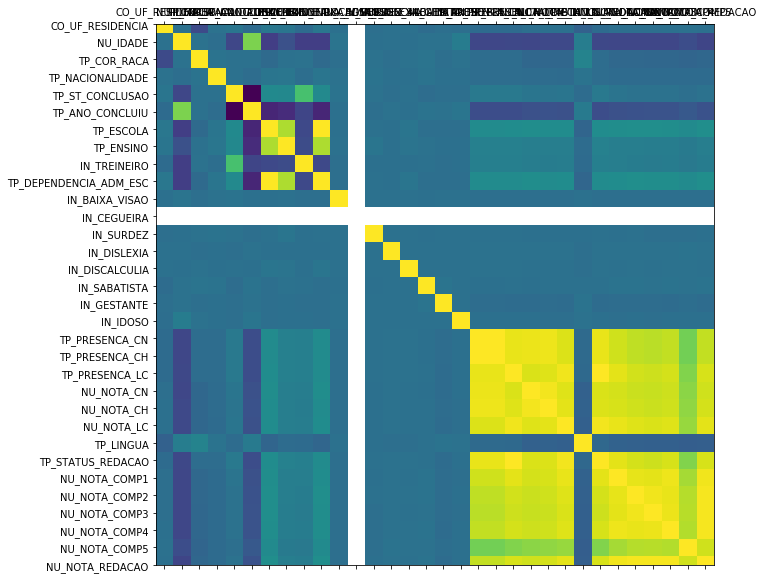

In [206]:
# Grafico de correlação entre as variáveis
def plot_corr(X, size=10):
    corr = X.corr()  
    fig, zx = plt.subplots(figsize = (size, size))
    zx.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  
plot_corr(X)

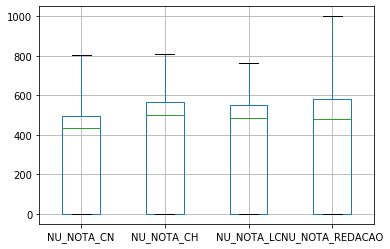

In [207]:
# Verificando possíveis outliers após tratamento dos dados
X[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].boxplot();

### Avaliação dos modelos de regressão

In [208]:
# Seleção das features e target
X = X[base] #Filtrando as variáveis 
# y já definido na escolha das variáveis

# Realizando normalização dos dados (Resultado não foi bom após a normalização)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# Dividindo dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [209]:
# Função criada para aplicação do modelo e medição da performance
def benchmark(reg):
    print('_' * 80)
    print("Training: ")
    print(reg)
    t0 = time()
    reg.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = reg.predict(X_test)
    y_true = list(y_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = reg.score(X_test, y_test)
    if score < 0 or score > 1:
        print("score: FAIL")
        score = 0
    else:
        print("score:   %0.3f" % score)
    
    if hasattr(reg, 'coef_'):
        print("intercept_: ", reg.intercept_)
        evs = explained_variance_score(y_test, pred)
        print('EVS (Explained Variance Score): {0:.2f}'.format(evs), ' [Best value is 1.0]')
        mre = max_error(y_test, pred)
        print('MRE (Max Residual Error): {0:.2f}'.format(mre), ' [Best value is 0.0]')
        mae = mean_absolute_error(y_test, pred)
        print('MAE (Mean Absolute Error): {0:.2f}'.format(mae), ' [Best value is 0.0]')
        mse = mean_squared_error(y_test, pred)
        print('MSE (Mean Squared Error): {0:.2f}'.format(mse), ' [Best value is 0.0]')
        r_2 = r2_score(y_test, pred)
        print('R^2 (Coefficient of Determination): {0:.2f}'.format(r_2), ' [Best value is 1.0]')
        print()

    print()
    reg_descr = str(reg).split('(')[0]
    return reg_descr, score, train_time, test_time, reg


In [210]:
# Lista que vai armazennar as métricas de cada modelo
results = []

In [211]:
print('=' * 80)
print('LinearSVR')
results.append(benchmark((LinearSVR())))

LinearSVR
________________________________________________________________________________
Training: 
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
train time: 1.588s
test time:  0.002s
score:   0.798
intercept_:  [-0.19416527]
EVS (Explained Variance Score): 0.87  [Best value is 1.0]
MRE (Max Residual Error): 420.71  [Best value is 0.0]
MAE (Mean Absolute Error): 75.43  [Best value is 0.0]
MSE (Mean Squared Error): 10610.05  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.80  [Best value is 1.0]




c:\program files (x86)\python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [212]:
print('=' * 80)
print('DecisionTreeRegressor')
results.append(benchmark((DecisionTreeRegressor())))

DecisionTreeRegressor
________________________________________________________________________________
Training: 
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
train time: 0.126s
test time:  0.003s
score:   0.837



In [213]:
print('=' * 80)
print('KNeighborsRegressor')
results.append(benchmark((KNeighborsRegressor())))

KNeighborsRegressor
________________________________________________________________________________
Training: 
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
train time: 0.134s
test time:  0.173s
score:   0.909



In [214]:
print('=' * 80)
print('Ridge')
results.append(benchmark((Ridge(alpha=1.0))))

Ridge
________________________________________________________________________________
Training: 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
train time: 0.011s
test time:  0.002s
score:   0.912
intercept_:  -41.68434327270592
EVS (Explained Variance Score): 0.91  [Best value is 1.0]
MRE (Max Residual Error): 512.96  [Best value is 0.0]
MAE (Mean Absolute Error): 47.33  [Best value is 0.0]
MSE (Mean Squared Error): 4630.50  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.91  [Best value is 1.0]




In [215]:
print('=' * 80)
print('RidgeCV')
results.append(benchmark((RidgeCV())))

RidgeCV
________________________________________________________________________________
Training: 
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
train time: 0.036s
test time:  0.002s
score:   0.912
intercept_:  -44.29421197550505
EVS (Explained Variance Score): 0.91  [Best value is 1.0]
MRE (Max Residual Error): 520.15  [Best value is 0.0]
MAE (Mean Absolute Error): 47.35  [Best value is 0.0]
MSE (Mean Squared Error): 4632.91  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.91  [Best value is 1.0]




In [216]:
print('=' * 80)
print('LinearRegression')
results.append(benchmark((LinearRegression())))

LinearRegression
________________________________________________________________________________
Training: 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
train time: 0.015s
test time:  0.002s
score:   0.912
intercept_:  -44.587511157609185
EVS (Explained Variance Score): 0.91  [Best value is 1.0]
MRE (Max Residual Error): 521.02  [Best value is 0.0]
MAE (Mean Absolute Error): 47.35  [Best value is 0.0]
MSE (Mean Squared Error): 4633.39  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.91  [Best value is 1.0]




In [217]:
print('=' * 80)
print('Lasso')
results.append(benchmark((Lasso())))

Lasso
________________________________________________________________________________
Training: 
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
train time: 0.399s
test time:  0.002s
score:   0.903
intercept_:  -2.37679569549681
EVS (Explained Variance Score): 0.90  [Best value is 1.0]
MRE (Max Residual Error): 368.99  [Best value is 0.0]
MAE (Mean Absolute Error): 50.01  [Best value is 0.0]
MSE (Mean Squared Error): 5085.56  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.90  [Best value is 1.0]




In [218]:
print('=' * 80)
print('ElasticNet')
results.append(benchmark((ElasticNet())))

ElasticNet
________________________________________________________________________________
Training: 
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
train time: 0.399s
test time:  0.002s
score:   0.903
intercept_:  -2.6846029281147707
EVS (Explained Variance Score): 0.90  [Best value is 1.0]
MRE (Max Residual Error): 368.97  [Best value is 0.0]
MAE (Mean Absolute Error): 49.98  [Best value is 0.0]
MSE (Mean Squared Error): 5082.06  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.90  [Best value is 1.0]




In [219]:
print('=' * 80)
print('Lars')
results.append(benchmark((Lars())))

Lars
________________________________________________________________________________
Training: 
Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=500, normalize=True, precompute='auto', verbose=False)
train time: 0.020s
test time:  0.002s
score:   0.912
intercept_:  -19.429641083655667
EVS (Explained Variance Score): 0.91  [Best value is 1.0]
MRE (Max Residual Error): 509.86  [Best value is 0.0]
MAE (Mean Absolute Error): 47.30  [Best value is 0.0]
MSE (Mean Squared Error): 4620.88  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.91  [Best value is 1.0]




c:\program files (x86)\python\lib\site-packages\sklearn\linear_model\_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 23 iterations, i.e. alpha=4.347e-04, with an active set of 23 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python\lib\site-packages\sklearn\linear_model\_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 23 iterations, i.e. alpha=3.452e-04, with an active set of 23 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


In [220]:
print('=' * 80)
print('LassoLars')
results.append(benchmark((LassoLars())))

LassoLars
________________________________________________________________________________
Training: 
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
train time: 0.008s
test time:  0.001s
score:   0.689
intercept_:  170.6629150895394
EVS (Explained Variance Score): 0.69  [Best value is 1.0]
MRE (Max Residual Error): 451.20  [Best value is 0.0]
MAE (Mean Absolute Error): 104.15  [Best value is 0.0]
MSE (Mean Squared Error): 16369.61  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.69  [Best value is 1.0]




In [221]:
print('=' * 80)
print('HuberRegressor')
results.append(benchmark((HuberRegressor(max_iter=10000))))

HuberRegressor
________________________________________________________________________________
Training: 
HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=10000,
               tol=1e-05, warm_start=False)
train time: 10.659s
test time:  0.002s
score:   0.910
intercept_:  -0.9505990916077497
EVS (Explained Variance Score): 0.91  [Best value is 1.0]
MRE (Max Residual Error): 634.84  [Best value is 0.0]
MAE (Mean Absolute Error): 46.87  [Best value is 0.0]
MSE (Mean Squared Error): 4748.72  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.91  [Best value is 1.0]




In [222]:
print('=' * 80)
print('BayesianRidge')
results.append(benchmark((BayesianRidge())))

BayesianRidge
________________________________________________________________________________
Training: 
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
train time: 0.043s
test time:  0.003s
score:   0.912
intercept_:  -42.27694190790987
EVS (Explained Variance Score): 0.91  [Best value is 1.0]
MRE (Max Residual Error): 514.59  [Best value is 0.0]
MAE (Mean Absolute Error): 47.34  [Best value is 0.0]
MSE (Mean Squared Error): 4630.95  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.91  [Best value is 1.0]




In [223]:
print('=' * 80)
print('PassiveAggressiveRegressor')
results.append(benchmark((PassiveAggressiveRegressor())))

PassiveAggressiveRegressor
________________________________________________________________________________
Training: 
PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
train time: 0.016s
test time:  0.002s
score:   0.899
intercept_:  [0.00292778]
EVS (Explained Variance Score): 0.90  [Best value is 1.0]
MRE (Max Residual Error): 403.12  [Best value is 0.0]
MAE (Mean Absolute Error): 49.49  [Best value is 0.0]
MSE (Mean Squared Error): 5317.11  [Best value is 0.0]
R^2 (Coefficient of Determination): 0.90  [Best value is 1.0]




In [224]:
print('=' * 80)
print('RandomForestRegressor')
results.append(benchmark((RandomForestRegressor())))

RandomForestRegressor
________________________________________________________________________________
Training: 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
train time: 6.815s
test time:  0.072s
score:   0.919



In [225]:
print('=' * 80)
print('MLPRegressor')
results.append(benchmark((MLPRegressor(hidden_layer_sizes=(500, )))))

MLPRegressor
________________________________________________________________________________
Training: 
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(500,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
train time: 28.257s
test time:  0.046s
score:   0.915



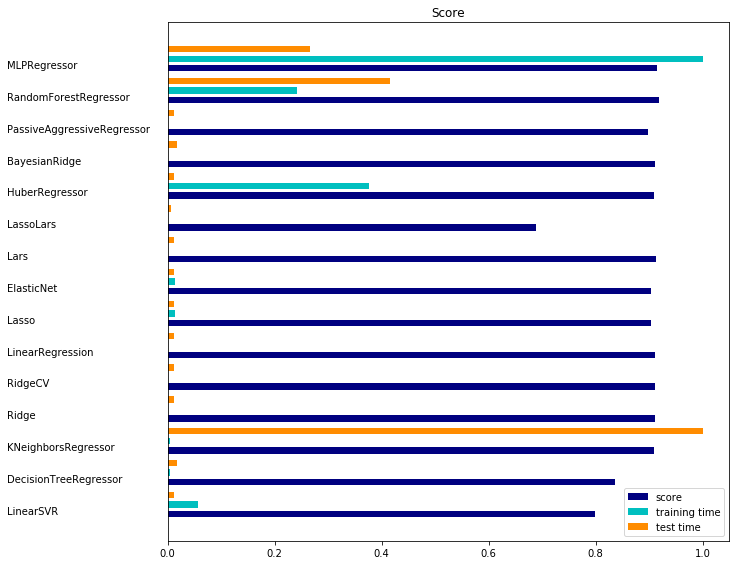

In [226]:
# Gráfico de avalização dos modelos
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

reg_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time", color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, reg_names):
    plt.text(-.3, i, c)

plt.show()

### Escolhendo modelo de regressão

In [227]:
model = benchmark(RandomForestRegressor())[4]

________________________________________________________________________________
Training: 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
train time: 7.596s
test time:  0.064s
score:   0.919



### Aplicando modelo nos dados de teste

In [228]:
# Preparando base de teste
df2 = test[base]

# Eliminando valores nulos na base de teste
df2.fillna(0, inplace=True)

# Normalizando os dados de teste
# df2 = scaler.fit_transform(df2)

# df2 = pd.DataFrame(data=df2, columns=base)

c:\program files (x86)\python\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [229]:
# Realizando a predição
df2['NU_NOTA_MT'] = model.predict(df2)

# Inserindo os numeros de inscrição
df2['NU_INSCRICAO'] = test['NU_INSCRICAO']

# Preparando df para exportação
df2 = df2[['NU_INSCRICAO', 'NU_NOTA_MT']]

c:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [230]:
# Exportação da predição para csv
df2.to_csv('answer.csv', index=False)

In [231]:
df2

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,424.051
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,436.727
2,b38a03232f43b11c9d0788abaf060f7366053b6d,614.312
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,538.804
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,448.343
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,476.107
4573,655fa6306720ff16e825903b5422a46608a77545,697.331
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,472.212
